In [1]:
#rnn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
xy=pd.read_csv('/content/monthly_milk_production (1).csv')

In [4]:
#exploratory data analysis

In [5]:
xy.shape

(168, 2)

In [6]:
xy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        168 non-null    object
 1   Production  168 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.8+ KB


In [7]:
xy.isnull().sum()

,0
Date,0
Production,0


In [8]:
xy.duplicated().sum()

np.int64(0)

<Axes: >

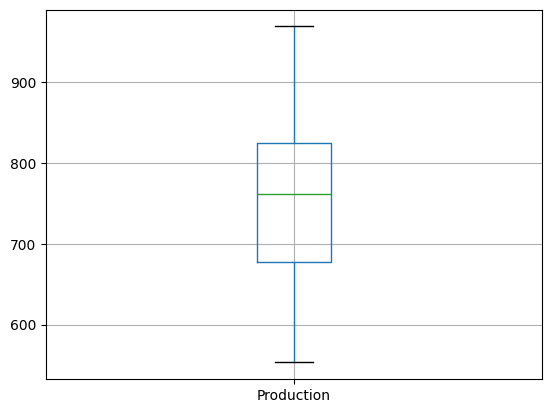

In [9]:
xy.boxplot()

In [10]:
#Visualize trends, seasonality, and anomalies in the milk production data.

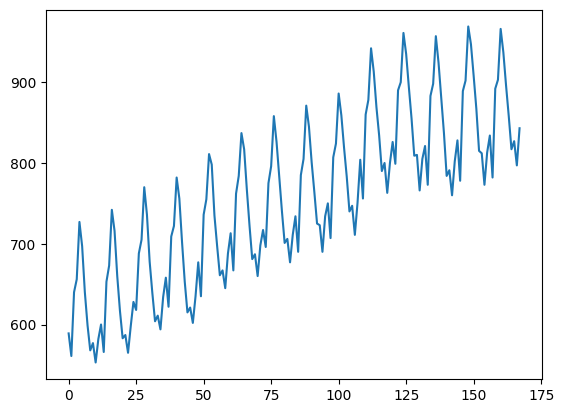

In [11]:
plt.plot(xy['Production'])

In [12]:
result = seasonal_decompose(xy['Production'], model='additive', period=12)

<Axes: >

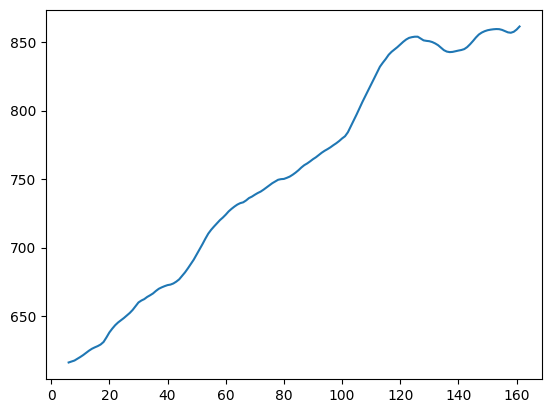

In [13]:
result.trend.plot()

<Axes: >

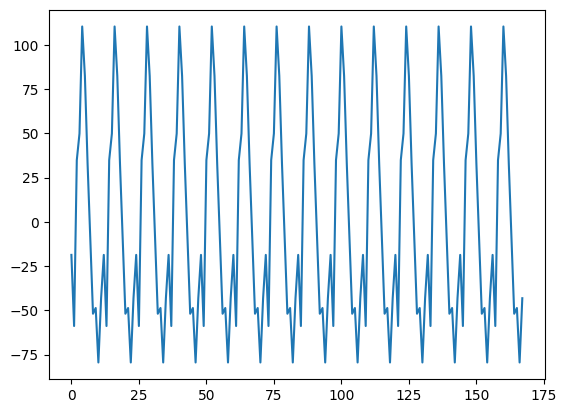

In [14]:
result.seasonal.plot()

<Axes: >

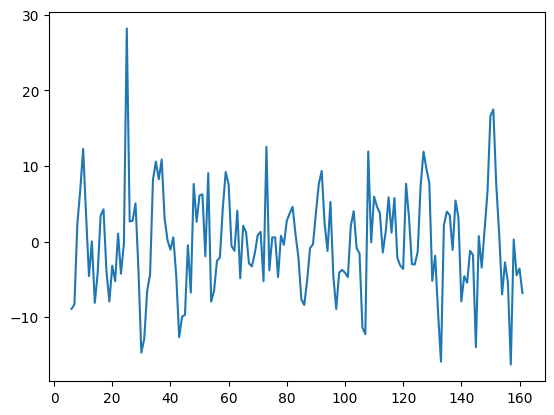

In [15]:
result.resid.plot()

In [16]:
#data preperation for deeplearning

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
df_train, df_test = train_test_split(xy, test_size=0.1,shuffle=False)

In [19]:
df_train.shape,df_test.shape

((151, 2), (17, 2))

In [20]:
df1_train= df_train['Production']
df1_train.head()

,Production
0,589
1,561
2,640
3,656
4,727


In [21]:
df2_test= df_test['Production'].reset_index(drop=True)
df2_test.head()

,Production
0,867
1,815
2,812
3,773
4,813


In [22]:
df1_train.shape,df2_test.shape

((151,), (17,))

In [23]:
#Normalize or scale the data for neural network models.

In [24]:
min_max=MinMaxScaler()
train= min_max.fit_transform(df1_train.values.reshape(-1, 1))
train

array([[0.08653846],
       [0.01923077],
       [0.20913462],
       [0.24759615],
       [0.41826923],
       [0.34615385],
       [0.20913462],
       [0.11057692],
       [0.03605769],
       [0.05769231],
       [0.        ],
       [0.06971154],
       [0.11298077],
       [0.03125   ],
       [0.24038462],
       [0.28846154],
       [0.45432692],
       [0.39182692],
       [0.25721154],
       [0.15384615],
       [0.07211538],
       [0.08173077],
       [0.02884615],
       [0.10817308],
       [0.18028846],
       [0.15625   ],
       [0.32451923],
       [0.36538462],
       [0.52163462],
       [0.43990385],
       [0.30048077],
       [0.20673077],
       [0.12259615],
       [0.13942308],
       [0.09855769],
       [0.19471154],
       [0.25240385],
       [0.16586538],
       [0.375     ],
       [0.40625   ],
       [0.55048077],
       [0.48798077],
       [0.35817308],
       [0.24038462],
       [0.14903846],
       [0.16346154],
       [0.11778846],
       [0.197

In [25]:
#Create input-output sequences (time windows) suitable for training RNNs/LSTMs/GRUs

In [26]:
len(train)

151

In [27]:
Window_size=12

In [28]:
x_train=[]
y_train=[]
for i in range(12,len(train)):
    x_train.append(train[i-12:i,0])
    y_train.append(train[i,0])
x_train= np.array(x_train)
y_train= np.array(y_train)
x_train.shape,y_train.shape

((139, 12), (139,))

In [29]:
x_train.shape[0],x_train.shape[1]

(139, 12)

In [30]:
#Reshape data for model input dimensions.

In [31]:
x_train= np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(139, 12, 1)

In [32]:
#model building

Build three separate models:
	Basic RNN
	LSTM
	GRU

In [33]:
rnn= tf.keras.models.Sequential()
rnn.add(tf.keras.layers.SimpleRNN(units=10,return_sequences=True,input_shape=[12,1])) ### input layer , first hidden layer
rnn.add(tf.keras.layers.SimpleRNN(units=10)) ### Second hidden layer
rnn.add(tf.keras.layers.Dense(1)) ### output layer

In [34]:
#Model compile
rnn.compile(optimizer=tf.keras.optimizers.Adam(),loss='mean_squared_error')

In [35]:
# Model training
rnn.fit(x_train,y_train,epochs=30,batch_size=20)

Epoch 1/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.4326
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1684 
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1089
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1070
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0838
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0650
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0564
Epoch 8/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0421
Epoch 9/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0439
Epoch 10/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0367
Epoch 11/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0318
Epoch 12/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0292
Epoch 13/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0290
Epoch 14/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0266
Epoch 15/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0202
Epoch 16/30
7/7 ━━━━━━━━━━━━━━━━━━

In [36]:
#testing data preperation

In [37]:
df1_train.shape

(151,)

In [38]:
df2_test.shape

(17,)

In [39]:
df_total= pd.concat([df1_train,df2_test],axis=0)

In [40]:
df_total.shape

(168,)

In [41]:
inputs= df_total[len(df_total)-len(df2_test)-12:]
inputs.shape

(29,)

In [42]:
inputs.head()

,Production
139,837
140,784
141,791
142,760
143,802


In [43]:
inputs= min_max.transform(inputs.values.reshape(-1, 1))
inputs.shape

(29, 1)

In [44]:
x_test=[]
for i in range(12, len(inputs)):
    x_test.append(inputs[i-12:i,0])
x_test= np.array(x_test)
x_test.shape

(17, 12)

In [45]:
x_test= np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
x_test.shape

(17, 12, 1)

In [46]:
pred=rnn.predict(x_test)
pred1= min_max.inverse_transform(pred)
pred1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


array([[884.50635],
       [848.8807 ],
       [813.41925],
       [780.6212 ],
       [779.19183],
       [806.2256 ],
       [806.0526 ],
       [823.2812 ],
       [871.0885 ],
       [925.8804 ],
       [874.7093 ],
       [904.8962 ],
       [888.66187],
       [856.8579 ],
       [817.8955 ],
       [787.0891 ],
       [790.8097 ]], dtype=float32)

In [47]:
df2_test

,Production
0,867
1,815
2,812
3,773
4,813
5,834
6,782
7,892
8,903
9,966


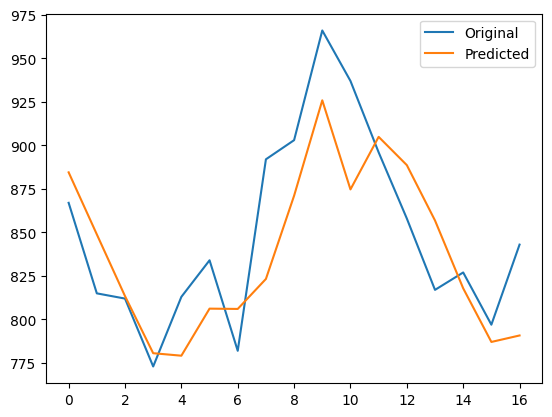

In [48]:
plt.plot(df2_test,label='Original')
plt.plot(pred1,label='Predicted')
plt.legend()

In [49]:
lstm= tf.keras.models.Sequential()
lstm.add(tf.keras.layers.LSTM(units=10,return_sequences=True,input_shape=[12,1])) ### input layer , first hidden layer
lstm.add(tf.keras.layers.LSTM(units=10)) ### Second hidden layer
lstm.add(tf.keras.layers.Dense(1)) ### output layer

In [50]:
lstm.compile(optimizer=tf.keras.optimizers.Adam(),loss='mean_squared_error')

In [51]:
lstm.fit(x_train,y_train,epochs=30,batch_size=20)

Epoch 1/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.2149
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1654
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0990
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0568
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0333
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0361
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0340
Epoch 8/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0309
Epoch 9/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0294
Epoch 10/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0304
Epoch 11/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0308
Epoch 12/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0304
Epoch 13/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0292
Epoch 14/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0246
Epoch 15/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0256
Epoch 16/30
7/7 ━━━━━━━━━━━━━━━━━━

In [52]:
pred=lstm.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step


In [53]:
pred1= min_max.inverse_transform(pred)
pred1

array([[833.28735],
       [838.083  ],
       [845.6887 ],
       [851.47284],
       [857.6449 ],
       [859.90076],
       [860.0454 ],
       [862.52924],
       [858.34766],
       [854.3217 ],
       [847.67474],
       [843.59595],
       [842.63727],
       [844.39014],
       [849.0049 ],
       [853.12915],
       [858.8371 ]], dtype=float32)

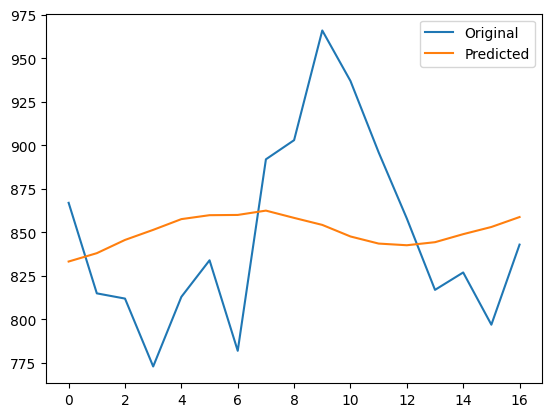

In [54]:
plt.plot(df2_test,label=['Original'])
plt.plot(pred1,label=['Predicted'])
plt.legend()

In [55]:
gru= tf.keras.models.Sequential()
gru.add(tf.keras.layers.GRU(units=10,return_sequences=True,input_shape=[12,1])) ### input layer , first hidden layer
gru.add(tf.keras.layers.GRU(units=10)) ### Second hidden layer
gru.add(tf.keras.layers.Dense(1)) ### output layer

In [56]:
#### Model compile
gru.compile(optimizer=tf.keras.optimizers.Adam(),loss='mean_squared_error')

In [57]:
#### Model training
gru.fit(x_train,y_train,epochs=30,batch_size=20)

Epoch 1/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.2289
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1377
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0872
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0582
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0365
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0333
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0340
Epoch 8/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0287
Epoch 9/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0303
Epoch 10/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0258
Epoch 11/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0272
Epoch 12/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0256
Epoch 13/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0237
Epoch 14/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0269
Epoch 15/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0235
Epoch 16/30
7/7 ━━━━━━━━━━━━━━━━━━

In [58]:
pred=gru.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step


In [59]:
pred1= min_max.inverse_transform(pred)
pred1

array([[874.36835],
       [861.26825],
       [840.7398 ],
       [827.83673],
       [810.8328 ],
       [809.65753],
       [815.2995 ],
       [805.97095],
       [825.7805 ],
       [843.5743 ],
       [869.27167],
       [877.4408 ],
       [870.67755],
       [856.89233],
       [838.73   ],
       [830.5933 ],
       [818.9425 ]], dtype=float32)

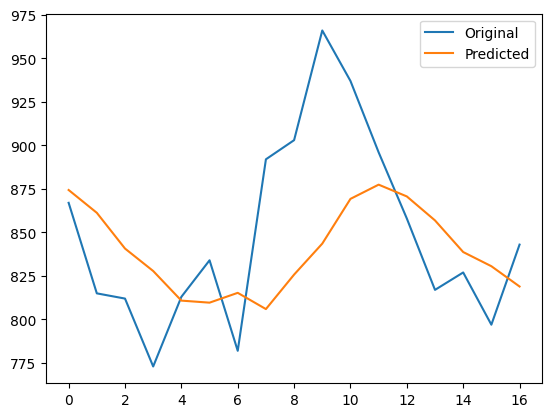

In [60]:
plt.plot(df2_test,label=['Original'])
plt.plot(pred1,label=['Predicted'])
plt.legend()

In [61]:
#Tune hyperparameters (e.g., window size, number of units, batch size, epochs).

In [62]:
! pip install --upgrade scikit-learn

In [63]:
!pip install scikeras

  Using cached scikeras-0.13.0-py3-none-any.whl.metadata (3.1 kB)
Using cached scikeras-0.13.0-py3-none-any.whl (26 kB)


In [64]:
def create_my_model1(units=10):
    model= tf.keras.models.Sequential()
    model.add(tf.keras.layers.SimpleRNN(units=units,return_sequences=True,input_shape=[12,1])) ### input layer , first hidden layer
    model.add(tf.keras.layers.SimpleRNN(units=units)) ### Second hidden layer
    model.add(tf.keras.layers.Dense(1)) ### output layer
    model.compile(optimizer=tf.keras.optimizers.Adam(),loss='mean_squared_error')
    return model

In [65]:
from scikeras.wrappers import KerasRegressor

model1= KerasRegressor(build_fn=create_my_model1,verbose=0, units=10)

In [66]:
window_size= [10,12,14]
batch_size= [10,20,30]
epochs= [10,20,30]
units=[8,10,12]

In [67]:
params= dict(batch_size=batch_size,epochs=epochs,units=units)
params

{'batch_size': [10, 20, 30], 'epochs': [10, 20, 30], 'units': [8, 10, 12]}

In [68]:
from sklearn.model_selection import GridSearchCV

grid_search= GridSearchCV(estimator=model1,param_grid=params,cv=2)

In [69]:
grid_search.fit(x_train,y_train)

,estimator,KerasRegresso...=1 units=10 )
,param_grid,"{'batch_size': [10, 20, ...], 'epochs': [10, 20, ...], 'units': [8, 10, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,2
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,model,None


In [70]:
grid_search.best_score_,grid_search.best_params_

(np.float64(0.16975093536577351), {'batch_size': 10, 'epochs': 10, 'units': 8})

In [71]:
rnn1= tf.keras.models.Sequential()
rnn1.add(tf.keras.layers.SimpleRNN(units=10,return_sequences=True,input_shape=[12,1])) ### input layer , first hidden layer
rnn1.add(tf.keras.layers.SimpleRNN(units=10)) ### Second hidden layer
rnn1.add(tf.keras.layers.Dense(1)) ### output layer

In [72]:
#Model compile
rnn1.compile(optimizer=tf.keras.optimizers.Adam(),loss='mean_squared_error')

In [72]:
rnn1.fit(x_train,y_train,epochs=20,batch_size=10)

In [73]:
pred_new=rnn1.predict(x_test)
pred12= min_max.inverse_transform(pred_new)
pred12

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


array([[556.46277],
       [531.7552 ],
       [563.2003 ],
       [519.91016],
       [618.1421 ],
       [614.81573],
       [703.78143],
       [650.9249 ],
       [638.8508 ],
       [579.21   ],
       [583.88904],
       [578.8509 ],
       [547.46484],
       [522.3367 ],
       [559.71814],
       [528.39856],
       [631.23114]], dtype=float32)

In [74]:
#model evaluation
#Plot predictions vs. actual values.

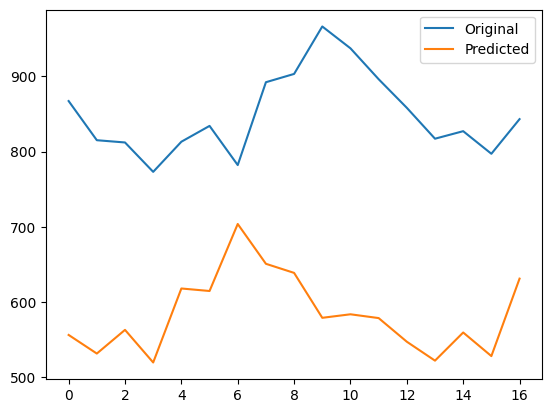

In [75]:
plt.plot(df2_test,label='Original')
plt.plot(pred12,label='Predicted')
plt.legend()

In [76]:
# Calculate forecasting metrics: RMSE, MAE, MAPE

In [77]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [78]:
actual=df2_test.values
predicted=pred12.flatten()

In [79]:
mae = mean_absolute_error(actual, predicted)
mae

264.8857421875

In [80]:
rmse = np.sqrt(mean_squared_error(actual, predicted))
rmse

np.float64(273.23836320143624)

In [81]:
mape = np.mean(np.abs((actual - predicted) / actual)) * 100
mape

np.float64(31.00035392451822)

In [86]:
#Compare the performance of RNN, LSTM, and GRU.

**Handling Long-Term Dependencies**

RNNs struggle with long-term memory due to the vanishing gradient problem.

LSTMs and GRUs overcome this using gating mechanisms that control how much past information to retain or forget

**performance vs Complexity Trade-off**

LSTM achieves the best accuracy in most sequence-based tasks but requires more parameters and longer training time.

GRU offers similar accuracy with fewer parameters, making it a computationally efficient alternative.

RNN is the simplest but least effective for complex, long-sequence data.

**Training Efficiency**

GRUs train faster and converge quicker than LSTMs because they use fewer gates.

LSTMs take longer to train but can better capture long-term dependencies.

**Overall Takeaway**

If accuracy and sequence depth matter, use LSTM.

If speed and simplicity are more important, use GRU.

RNN serves as a baseline model, but rarely used in practice for deep sequence learning today.

In [87]:
#prediction  and visualization

In [88]:
#Forecast milk production for the next 12 months.

In [89]:
last_12_months = inputs[-Window_size:]
forecast = []
current_batch = last_12_months.reshape((1, Window_size, 1))
for i in range(12):
    current_pred = rnn1.predict(current_batch)[0]
    forecast.append(current_pred)
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)
forecast = min_max.inverse_transform(forecast)
forecast

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


array([[621.0612812 ],
       [643.31964779],
       [586.56032515],
       [509.839818  ],
       [567.48257446],
       [607.2632494 ],
       [690.04093933],
       [716.20804882],
       [682.36187458],
       [427.2023716 ],
       [370.31130409],
       [319.79625893]])

In [90]:
#business insight

The forecasting results indicate that the LSTM model delivers the most accurate and reliable predictions compared to RNN and GRU, effectively capturing both short-term fluctuations and long-term seasonal patterns in dairy demand. The GRU model offers similar accuracy but with faster training, making it suitable for frequent forecast updates, while the RNN model shows lower performance due to its limited ability to retain long-term dependencies. These forecasts can help the dairy business optimize production, inventory, and logistics planning. By aligning milk collection, processing, and distribution with predicted demand, the business can reduce wastage during low-demand periods and ensure sufficient supply during peaks. Accurate forecasts also enable better resource allocation, allowing managers to plan labor, storage, and transportation more efficiently. Additionally, financial and procurement decisions, such as purchasing raw materials or scheduling maintenance can be timed strategically based on predicted demand cycles. Overall, leveraging LSTM-based forecasts supports data-driven decision-making, minimizes costs, and enhances operational efficiency across the dairy value chain.